<a href="https://colab.research.google.com/github/Parniaan/AI4Code/blob/main/ECS245_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
data_dir = '/content/drive/My Drive/ECS245/data'

In [38]:
!ls "/content/drive/My Drive/ECS245/data/"

merged_logs.csv			shuffled_logs.csv  unreproducible_logs_failed.csv
reproducible_logs_failed.csv	test_logs.csv	   unreproducible_logs_metadata.csv
reproducible_logs_metadata.csv	train_logs.csv


In [55]:
reproducible_logs = os.path.join(data_dir,"reproducible_logs_metadata.csv")
reproducible_df = pd.read_csv(reproducible_logs)
print(reproducible_df.head())

   Unnamed: 0                                           artifact  tr_build_id  \
0           0                         raphw-byte-buddy-168135150          NaN   
1           1                         raphw-byte-buddy-168135150          NaN   
2           2  Adobe-Consulting-Services-acs-aem-commons-4565...          NaN   
3           3  Adobe-Consulting-Services-acs-aem-commons-4565...          NaN   
4           4                             owlcs-owlapi-112316293          NaN   

                                           tr_job_id tr_log_lan tr_log_status  \
0                         raphw-byte-buddy-168135150       java            ok   
1                         raphw-byte-buddy-168135150       java            ok   
2  Adobe-Consulting-Services-acs-aem-commons-4565...       java            ok   
3  Adobe-Consulting-Services-acs-aem-commons-4565...       java            ok   
4                             owlcs-owlapi-112316293       java            ok   

   tr_log_setup_time tr_lo

In [56]:
unreproducible_logs = os.path.join(data_dir, "unreproducible_logs_metadata.csv")
unreproducible_df = pd.read_csv(unreproducible_logs)
print(unreproducible_df.head())

   Unnamed: 0                                           artifact  tr_build_id  \
0           0              yt-dlp-yt-dlp-33086858046-33086876535          NaN   
1           1              yt-dlp-yt-dlp-33086858046-33086876535          NaN   
2           2                kcctl-kcctl-32758363399-32758805737          NaN   
3           3                kcctl-kcctl-32758363399-32758805737          NaN   
4           4  python-websockets-websockets-32906849507-32906...          NaN   

     tr_job_id tr_log_lan tr_log_status  tr_log_setup_time tr_log_analyzer  \
0  33086876535     python            ok               2.17          python   
1  33086858046     python        broken               2.81          python   
2  32758805737       java            ok               3.24      java-maven   
3  32758363399       java        broken               1.76      java-maven   
4  32906849507     python        broken               1.92          python   

  tr_log_frameworks  tr_log_bool_tests_ran  

In [58]:
# General Information
reproducible_count = len(reproducible_df)
unreproducible_count = len(unreproducible_df)

# Count missing values per column
missing_values_reproducible = reproducible_df.isnull().sum()
missing_values_unreproducible = unreproducible_df.isnull().sum()

# Count unique values per column
unique_values_reproducible = reproducible_df.nunique()
unique_values_unreproducible = unreproducible_df.nunique()

# Describe numerical columns
numerical_stats_reproducible = reproducible_df.describe()
numerical_stats_unreproducible = unreproducible_df.describe()

# Get most common values for categorical columns
categorical_columns = ['tr_log_lan', 'tr_build_system', 'tr_log_frameworks']
common_values_reproducible = {col: reproducible_df[col].mode()[0] if not reproducible_df[col].mode().empty else "None" for col in categorical_columns}
common_values_unreproducible = {col: unreproducible_df[col].mode()[0] if not unreproducible_df[col].mode().empty else "None" for col in categorical_columns}

# Save data to CSV files
missing_values_reproducible.to_csv(os.path.join(data_dir,"/missing_values_reproducible.csv"))
missing_values_unreproducible.to_csv(os.path.join(data_dir,"/missing_values_unreproducible.csv"))
unique_values_reproducible.to_csv(os.path.join(data_dir,"unique_values_reproducible.csv"))
unique_values_unreproducible.to_csv(os.path.join(data_dir,"unique_values_unreproducible.csv"))
numerical_stats_reproducible.to_csv(os.path.join(data_dir,"numerical_stats_reproducible.csv"))
numerical_stats_unreproducible.to_csv(os.path.join(data_dir,"numerical_stats_unreproducible.csv"))

# Print key insights
summary = {
    "Total Reproducible Builds": reproducible_count,
    "Total Unreproducible Builds": unreproducible_count,
    "Most Common Values in Reproducible": common_values_reproducible,
    "Most Common Values in Unreproducible": common_values_unreproducible
}

summary


{'Total Reproducible Builds': 6496,
 'Total Unreproducible Builds': 753,
 'Most Common Values in Reproducible': {'tr_log_lan': 'java',
  'tr_build_system': 'Maven',
  'tr_log_frameworks': 'JUnit'},
 'Most Common Values in Unreproducible': {'tr_log_lan': 'python',
  'tr_build_system': 'Maven',
  'tr_log_frameworks': 'pytest'}}

Load dataset

<ipython-input-60-c30bf6b4ffbe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Build Type', y='Count', data=df_counts, palette=['green', 'red'])  # Create a bar plot


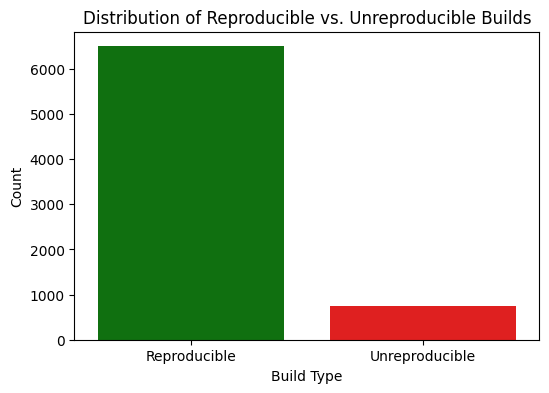

In [60]:
df_counts = pd.DataFrame({
    'Build Type': ['Reproducible', 'Unreproducible'],
    'Count': [reproducible_count, unreproducible_count]
})

# Plot class distribution
plt.figure(figsize=(6, 4))  # Set the figure size
sns.barplot(x='Build Type', y='Count', data=df_counts, palette=['green', 'red'])  # Create a bar plot
plt.title('Distribution of Reproducible vs. Unreproducible Builds')  # Set title
plt.ylabel('Count')  # Label for y-axis
plt.xlabel('Build Type')  # Label for x-axis
plt.savefig(os.path.join(data_dir,"class_distribution.png"))  # Save the plot as an image file

# Show the plot
plt.show()

Reproducible  Unreproducible
1076          529               1
5420          224               1
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

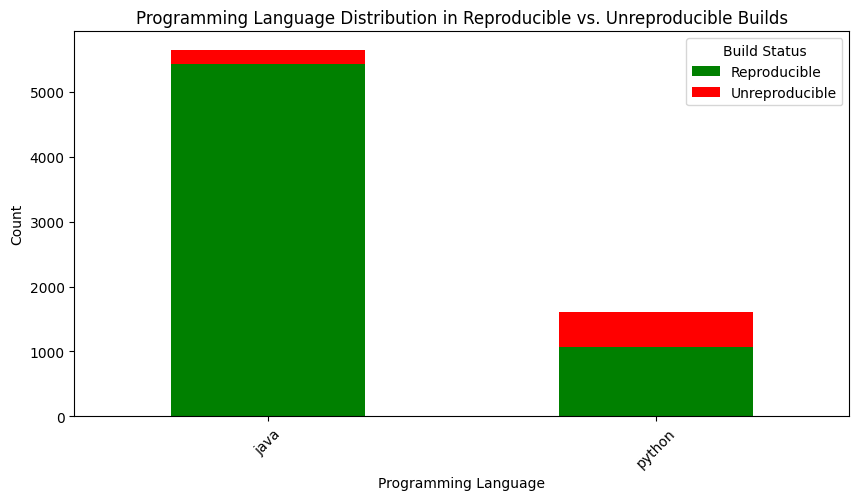

In [64]:
# Assuming reproducible_df and unreproducible_df are loaded as pandas DataFrames

# Count the occurrences of each language in both datasets
lang_reproducible = reproducible_df['tr_log_lan'].value_counts()
lang_unreproducible = unreproducible_df['tr_log_lan'].value_counts()

# Combine counts into a single DataFrame for comparison
lang_df = pd.DataFrame({'Reproducible': lang_reproducible, 'Unreproducible': lang_unreproducible}).fillna(0)
print(lang_df.value_counts())
# Plot
plt.figure(figsize=(10, 5))
lang_df.plot(kind='bar', stacked=True, figsize=(10, 5), color=['green', 'red'])
plt.title('Programming Language Distribution in Reproducible vs. Unreproducible Builds')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Build Status")
plt.savefig(os.path.join(data_dir,"language_distribution.png"))  # Save plot
plt.show()


Reproducible  Unreproducible
5420          224               1
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

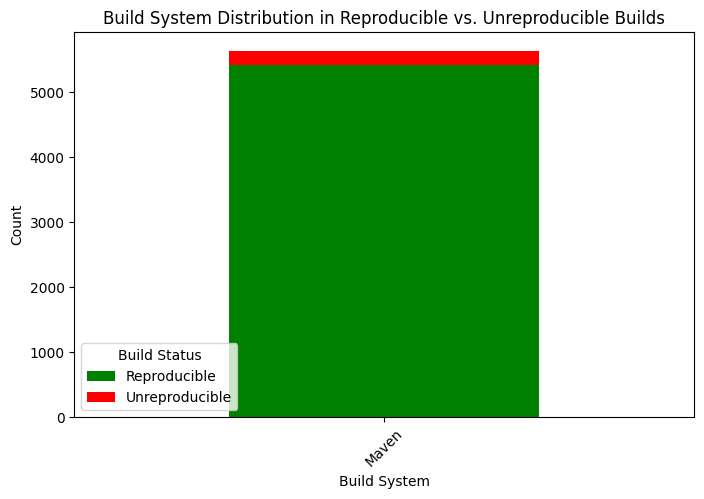

In [65]:
# Count the occurrences of each build system
build_reproducible = reproducible_df['tr_build_system'].value_counts()
build_unreproducible = unreproducible_df['tr_build_system'].value_counts()

# Combine counts into a single DataFrame
build_df = pd.DataFrame({'Reproducible': build_reproducible, 'Unreproducible': build_unreproducible}).fillna(0)
print(build_df.value_counts())
# Plot
plt.figure(figsize=(8, 5))
build_df.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'red'])
plt.title('Build System Distribution in Reproducible vs. Unreproducible Builds')
plt.xlabel('Build System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Build Status")
plt.savefig(os.path.join(data_dir,"build_system_distribution.png"))  # Save plot
plt.show()


In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
# Separate features and labels
X = data.iloc[:, :-1].values  # Select all columns except the last one
y = data.iloc[:, -1].values   # Select the last column (labels)


In [ ]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape y to be column vector

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.